running ...
547


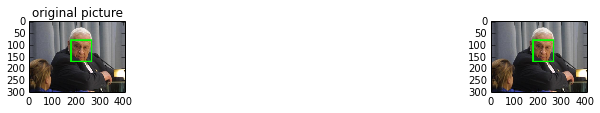

727


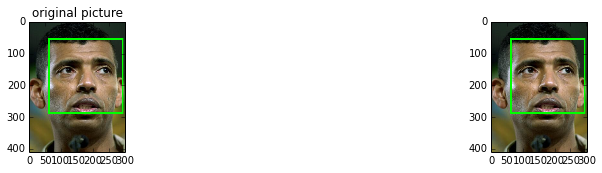

359
465


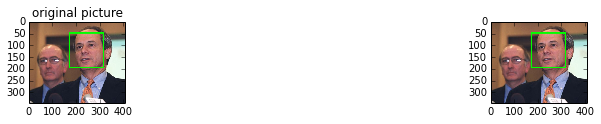

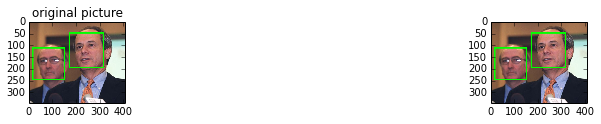

751


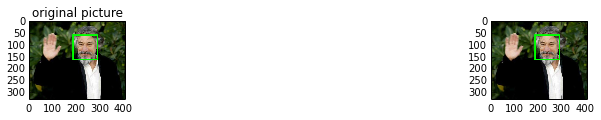

666


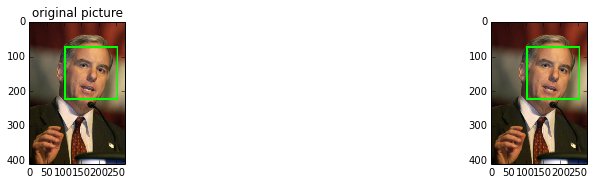

106


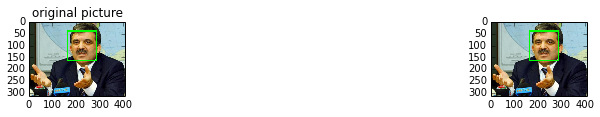

417


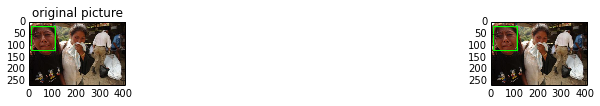

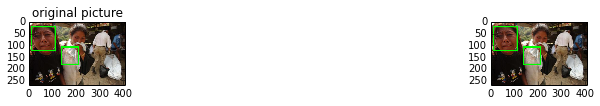

844


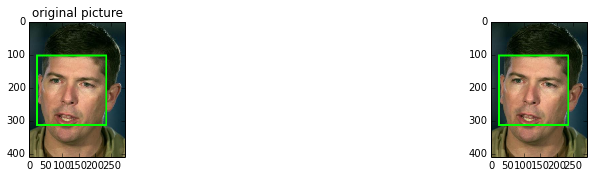

722


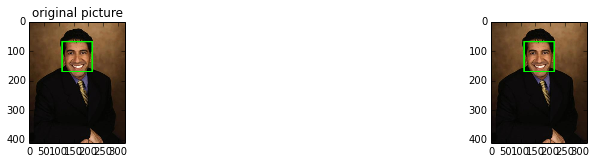

297


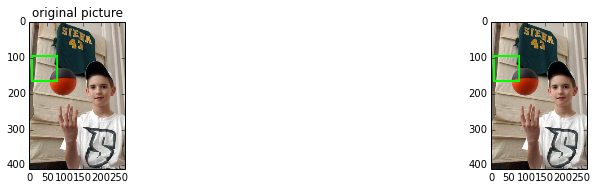

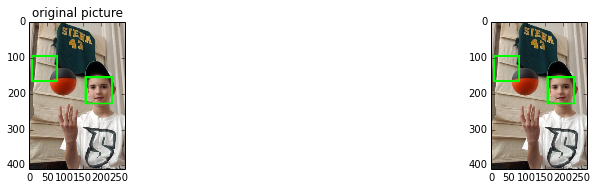

725


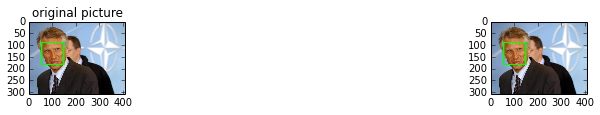

686


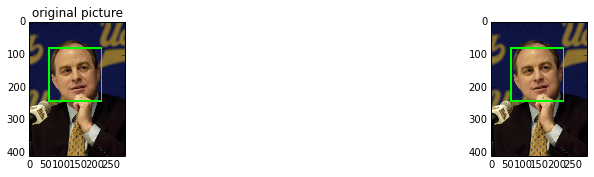

964


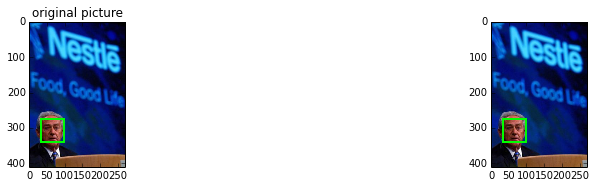

604


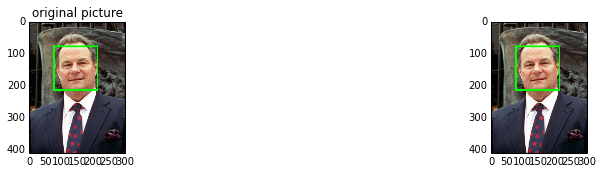

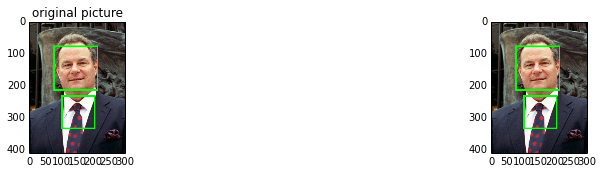

598


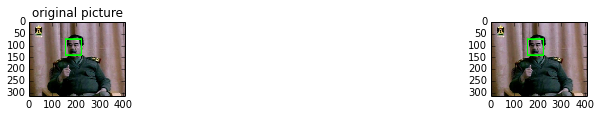

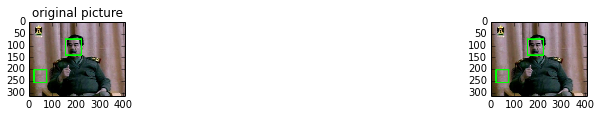

271


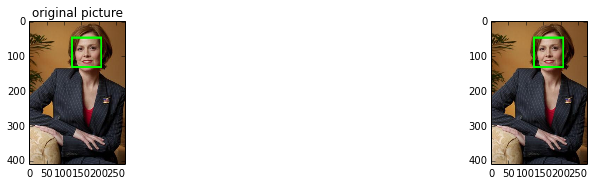

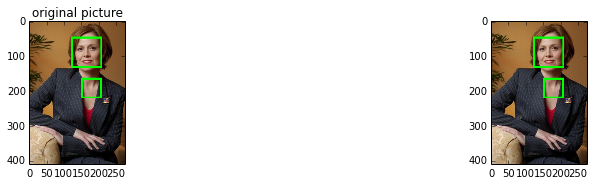

784


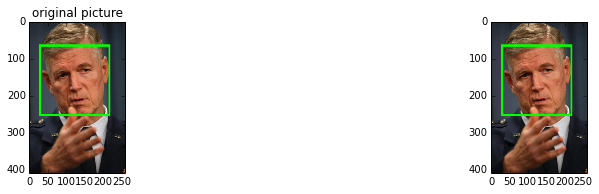

590


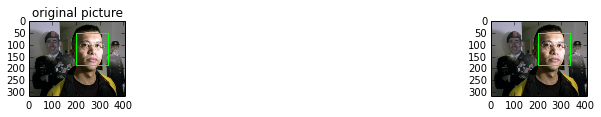

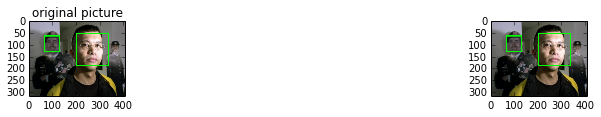

621


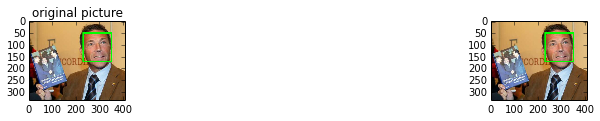

795


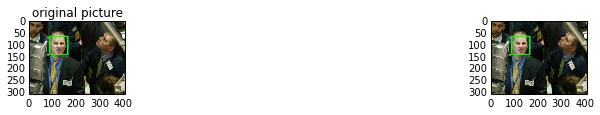

991


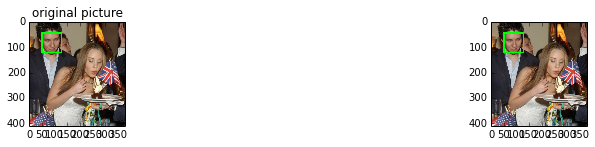

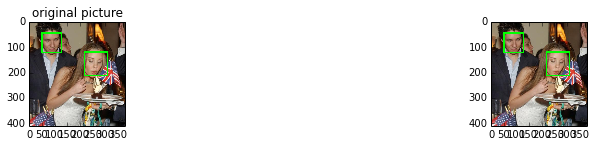

151


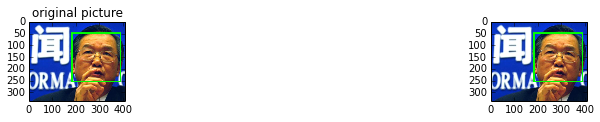

667


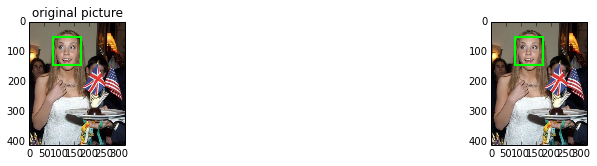

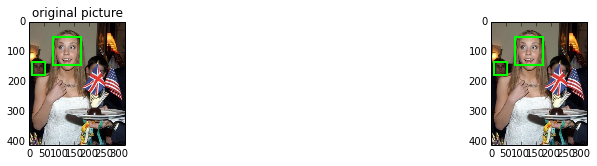

16


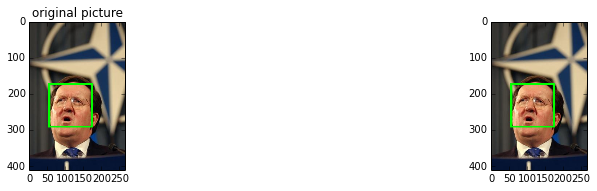

329


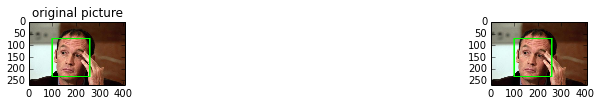

651


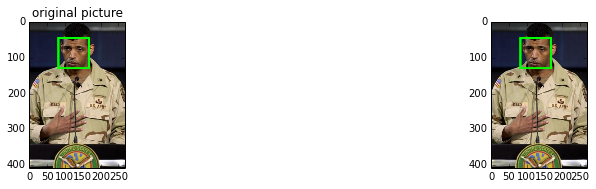

322


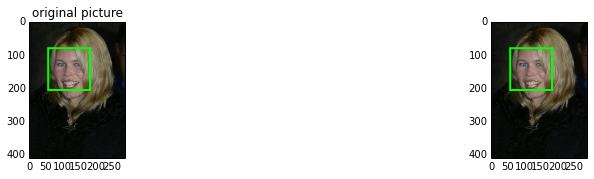

NameError: global name 'labels' is not defined

In [2]:
import cv2,os
import numpy as np
from PIL import Image
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import random

print("running ...")

recognizer = cv2.face.LBPHFaceRecognizer_create()
cascadePath = "Classifiers/face.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
path = 'dataset2/originalPics/2003/04/03/big/'
def get_images_and_labels(path):
     lower = np.array([0, 48, 80], dtype = "uint8")
     upper = np.array([20, 255, 255], dtype = "uint8")

     image_paths = [os.path.join(path, f) for f in os.listdir(path)]
     # array images to hold images
     images = []
     # labels will contains the label that is assigned to the image
     #labels = []
     for image_path in image_paths:
         # Read the image and convert to grayscale
         image_pil = Image.open(image_path)
         # Convert the image format into numpy array
         image = np.array(image_pil, 'uint8')
         
         # Get the label of the image
         nbr = random.randint(1,1000)#os.path.split(image_path)[1].split(".")[0].replace("face-", "")
         #nbr=int(''.join(str(ord(c)) for c in nbr))
         print nbr
         # Detect the face in the image
         faces = faceCascade.detectMultiScale(image,            
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE)
         # If face is detected, append the face to images and the label to labels
         for (x, y, w, h) in faces:
             maskedImage = image[:]
             images.append(image[y: y + h, x: x + w])
             #labels.append(nbr)
             fig = plt.figure(figsize=(10, 30))
             plt.subplot(1, 5, 1)
             plt.title("original picture")
             plt.imshow(image,cmap='gray')
                
             face_region = image[y: y + h, x: x + w]
             converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

             plt.subplot(1, 5, 5)
             #resImage = cv2.inpaint(image,skinMask,8,cv2.INPAINT_NS)
             maskedImage[y: y + h, x: x + w] = get_drawRectangleAroundImage(face_region)
             #resImage = cv2.add(image,skinMask)
             plt.imshow(maskedImage)
             plt.show()
                
                
             cv2.waitKey(10)
     # return the images list and labels list
     return images, labels

def get_drawRectangleAroundImage(img):
    height, width, channels = img.shape
    img = cv2.rectangle(img,(0,0),(height,width),(0,255,0),10)
    return img    
    

images, labels = get_images_and_labels(path)
#cv2.imshow('test',images[0])
cv2.waitKey(1)

#recognizer.train(images, np.array(labels))
#recognizer.write('trainer/trainer.yml')
cv2.destroyAllWindows()

